# Basic examples of NetworkX and how to use this library

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)

In [3]:
G.add_nodes_from([2, 3, 4, 5, 6])
G.add_edges_from([(1, 2), (4, 5), (3, 5), (2, 3), (5, 6)])

In [4]:
# [0, 1, 2, 3, 4, 5, 6]
print(G.nodes())
# [(0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (5, 6)]
print(G.edges())

[1, 2, 3, 4, 5, 6]
[(1, 2), (2, 3), (3, 5), (4, 5), (5, 6)]


In [5]:
G.add_node("ib")
G.add_edge(3, "ib")

In [6]:
# [(0, {}), (1, {'color': 'red', 'count': 10}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), ('ib', {})]
G.nodes[1]["color"] = "red"
G.nodes[1]["count"] = 10
print(G.nodes.data())

[(1, {'color': 'red', 'count': 10}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), ('ib', {})]


In [7]:
from networkx.algorithms import approximation as aprx
G.add_edge(4,6)

In [8]:
print(aprx.max_clique(G))
# {4, 5, 6}
print(len(aprx.max_clique(G)))
# 3
max_clique = G.subgraph(aprx.max_clique(G))

{4, 6}
2


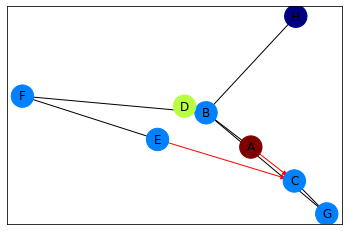

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [
        ("A", "B"),
        ("A", "C"),
        ("D", "B"),
        ("E", "C"),
        ("E", "F"),
        ("B", "H"),
        ("B", "G"),
        ("B", "F"),
        ("C", "G"),
    ]
)

val_map = {"A": 1.0, "D": 0.5714285714285714, "H": 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [("A", "C"), ("E", "C")]
edge_colours = ["black" if not edge in red_edges else "red" for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(
    G, pos, cmap=plt.get_cmap("jet"), node_color=values, node_size=500
)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color="r", arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

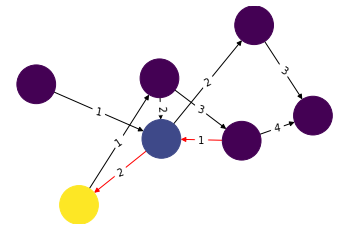

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.DiGraph()

G.add_edges_from([("A", "B"), ("C", "D"), ("G", "D")], weight=1)
G.add_edges_from([("D", "A"), ("D", "E"), ("B", "D"), ("D", "E")], weight=2)
G.add_edges_from([("B", "C"), ("E", "F")], weight=3)
G.add_edges_from([("C", "F")], weight=4)


val_map = {"A": 1.0, "D": 0.5714285714285714, "H": 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels = dict([((u, v,), d["weight"]) for u, v, d in G.edges(data=True)])
red_edges = [("C", "D"), ("D", "A")]
edge_colors = ["black" if not edge in red_edges else "red" for edge in G.edges()]

pos = nx.spring_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(
    G,
    pos,
    node_color=values,
    node_size=1500,
    edge_color=edge_colors,
    edge_cmap=plt.cm.Reds,
)
pylab.show()

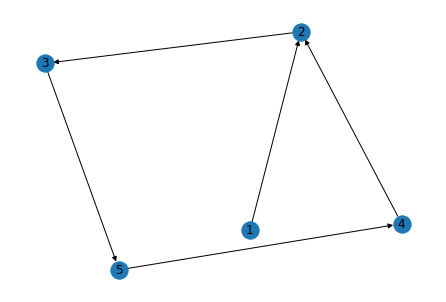

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.DiGraph()
g.add_nodes_from([1,2,3,4,5])
g.add_edge(1,2)
g.add_edge(4,2)
g.add_edge(3,5)
g.add_edge(2,3)
g.add_edge(5,4)

nx.draw(g,with_labels=True)
plt.draw()
plt.show()

In [12]:
g.add_edges_from([(1,2),(2,5)], weight=2)

In [13]:
G = nx.Graph()

print(G.nodes())
print(G.edges())

print(type(G.nodes()))
print(type(G.edges()))

[]
[]
<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>


In [14]:
G=nx.Graph()
G.add_node("a")
G.add_nodes_from(["b","c"])

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
['a', 'b', 'c']
Edges of graph: 
[]


In [15]:
G=nx.Graph()
G.add_node("a")
G.add_nodes_from(["b","c"])

G.add_edge(1,2)
edge = ("d", "e")
G.add_edge(*edge)
edge = ("a", "b")
G.add_edge(*edge)

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
['a', 'b', 'c', 1, 2, 'd', 'e']
Edges of graph: 
[('a', 'b'), (1, 2), ('d', 'e')]


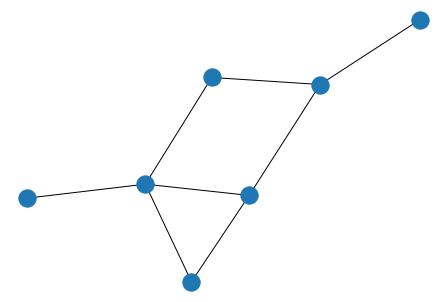

In [16]:
# adding a list of edges:
G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])
nx.draw(G)
plt.savefig("simple_path.png")
plt.show()

Nodes of graph: 
[0, 1, 2, 3]
Edges of graph: 
[(0, 1), (1, 2), (2, 3)]


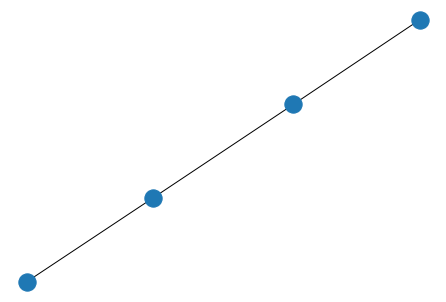

In [17]:
G=nx.path_graph(4)

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())
nx.draw(G)
plt.savefig("path_graph1.png")
plt.show()

Nodes of graph: 
['Toronto', 'London', 'Berlin', 'New York']
Edges of graph: 
[('Toronto', 'London'), ('London', 'Berlin'), ('Berlin', 'New York')]


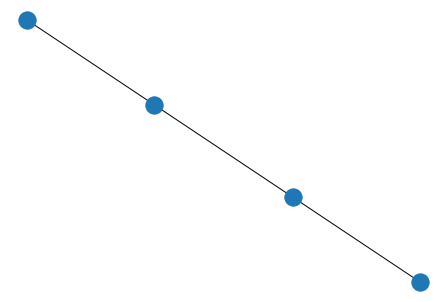

In [18]:
G = nx.path_graph(4)
cities = {0: "Toronto", 1: "London", 2: "Berlin", 3: "New York"}
H = nx.relabel_nodes(G, cities)

print("Nodes of graph: ")
print(H.nodes())
print("Edges of graph: ")
print(H.edges())
nx.draw(H)
plt.savefig("path_graph_cities.png")
plt.show()

In [19]:
G=nx.path_graph(10)
mapping=dict(zip(G.nodes(),"abcde"))
nx.relabel_nodes(G, mapping, copy=False)
 
print("Nodes of graph: ")
print(G.nodes())

Nodes of graph: 
[5, 6, 7, 8, 9, 'a', 'b', 'c', 'd', 'e']


In [20]:
G = nx.path_graph(10)


def mapping(x):
    return x + 100


nx.relabel_nodes(G, mapping, copy=False)

print("Nodes of graph: ")
print(G.nodes())

Nodes of graph: 
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
